In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, Select, RangeSlider, LinearAxis, Div, Span, CustomJS, RadioButtonGroup, Label, CheckboxGroup
from bokeh.layouts import column, row
from datetime import  datetime

import statsmodels

from bokeh.plotting import figure, show
from bokeh.io import output_notebook

import matplotlib.dates as mdates

# Part I.1: Data Exploration and Basic Plots

## Context and Motivation
Before diving into complex analysis, we need to understand our data structure and create baseline visualizations. The COVID-19 dataset contains daily state-level observations, but national-level trends will help us identify overall patterns and the impact of the presidential transition on January 20, 2021.

---

## Exercise 1.1: Loading and Examining Data Structure

**Task:** Load the COVID dataset and explore its basic properties.

The dataset can downloaded [here](https://raw.githubusercontent.com/nytimes/covid-19-data/refs/heads/master/us-states.csv)

### Questions:
1. What is the date range of our dataset?
2. How many states are included?
3. Are those daily deaths ?
4. Are there any missing values or data quality issues?

In [21]:
df = pd.read_csv("us-states.csv", parse_dates=["date"])

# Examine structure
...

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Basic data exploration
...

# Basic statistics
...

# Check for missing values
...

Ellipsis

## Exercise 1.2: Calculate National Metrics

**Task:** Aggregate state data to national level and calculate derived metrics:
- daily deaths / cases
- moving 7 days average of daily deaths

### Questions:
1. How do you properly calculate daily death counts from cumulative data?
2. Why do we need 7-day moving averages?
3. What patterns do you observe in the raw daily data?

In [22]:
# Create national daily aggregates
national_data = df.groupby('date').agg({
    'cases': 'sum',
    'deaths': 'sum'
}).reset_index().sort_values('date')

###########################
# !!!!!!!!!!!!!!!!!!!!!!!!! DATA IS CUMULATIVE
###########################

# Data is cumulative, calculate daily differences
...

# Calculate 7-day moving averages
...

Ellipsis

## Exercise 1.3: Raw comparison
**Task:** Recreate the chart from The Economist/Reuters analysis but **showing cumulative deaths** with presidential periods highlighted.

Ellipsis

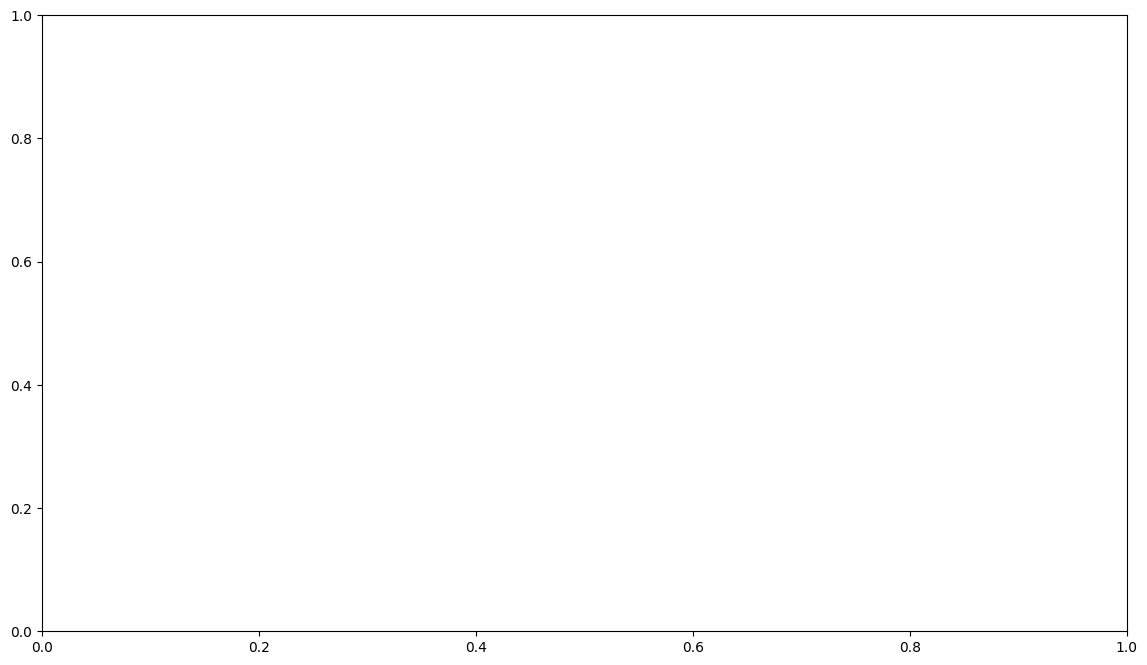

In [25]:
# Calculate cumulative deaths for the chart
national_data_sorted = ...
#national_data_sorted['cumulative_deaths'] = ...

# Define key periods
trump_start = datetime(2020, 3, 1)  # Pandemic start
transition_date = datetime(2021, 1, 20)
biden_analysis_end = datetime(2022, 5, 11)  # End date from analysis

# Filter data for the analysis period
chart_data = ...

fig, ax = plt.subplots(figsize=(14, 8))

# Define colors for presidential periods
trump_color = '#E74C3C'  # Red
biden_color = '#3498DB'  # Blue

# Plot cumulative deaths with period-specific colors
trump_data = ...
biden_data = ...

# Graph
...


# Styling 
...

#plt.tight_layout()
#plt.show()

# Part I.2: Comparative Visualizations

## Exercise 2.1: State-Level Comparisons

National aggregates hide important state-level variation. Different states experienced the pandemic at different times and with varying intensity. Understanding these patterns requires comparative visualization techniques and correlation analysis to reveal the relationship between cases and deaths with appropriate time lags.

**Task:** Identify and visualize the 5 states with the highest total deaths using small multiples.

**Questions:**

- Which states were most affected by COVID-19?
- Do these states show similar temporal patterns?


### Advantages of single graph:

- Direct comparison of magnitudes
- Direct comparison of magnitudes
- Easy to see which state had highest peaks
- Temporal alignment visible at a glance
- More compact presentation

### When to use small multiples instead:

- More than 4 lines (readability)
- Different scales needed per entity
- Focus on individual patterns rather than comparison
- Want to show more detail per entity
  
## Exercise 2.2: Cases vs Deaths Scatter Analysis

**Task:** Create a scatter plot to analyze the relationship between total cases and deaths across all states.

### Questions:
1. Is there a linear relationship between cases and deaths?
2. Which states are outliers (better or worse than expected)?
3. What might explain variation in case fatality rates?
4. How can we identify these patterns visually?

# Part I.3: Statistical Analysis 


## Exercise 3.1: Death Rate Distributions by Administration

**Task:** Compare the distribution of daily death rates between Trump and Biden administrations using statistical visualizations.

### Questions:
1. What is the typical (median) daily death rate in each period?
2. How variable are death rates within each administration?
3. Are the distributions significantly different?

## Exercise 3.2: Building the Interactive Data Explorer 

**Task:** Create an interactive dashboard for exploring COVID-19 data by state and time period.

### Objectives:
1. **State selector**: Dropdown to choose any state or "National"
2. **Date range slider**: Select time period to analyze
5. **Interactive tools**: Hover tooltips, zoom, pan, reset

Proceed step by step ! Otherwise you will drown...

# Part III: Presidential Analysis Dashboard

Parts I and II showed that raw statistics appear similar between administrations, but contexts were dramatically different. This section teaches sophisticated decomposition methods to adjust for confounding factors: vaccine availability, variant severity, seasonal patterns, and inherited conditions. Students will build an interactive dashboard that reveals whether performance differences persist after contextual adjustment.



## Part III.2: Trend Decomposition Engine

**Task:** Decompose the death rate time series into trend, seasonal, and residual components to isolate administration performance.

Use `from statsmodels.tsa.seasonal import STL`

What systematic patterns should we remove before comparing?

## Optional : Time-Lagged Correlation Analysis

**Task:** Analyze the relationship between cases and deaths with time lags to understand the delay between infection and mortality.

### Questions:
1. What is the typical lag between case surges and death surges?
2. How do we calculate correlation with time shifts?
3. Did this lag change over time (better treatments, vaccines)?
4. What does the correlation function tell us about pandemic dynamics?


# Challenge

Make the graph above with bokeh so that the reader can visually estimate which lag seems better to them. The lag should be dynamic, set by a slider.